In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

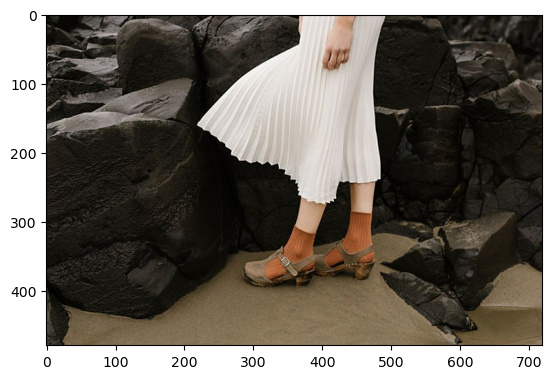

In [7]:
img=cv2.imread("a1images/highlights_and_shadows.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

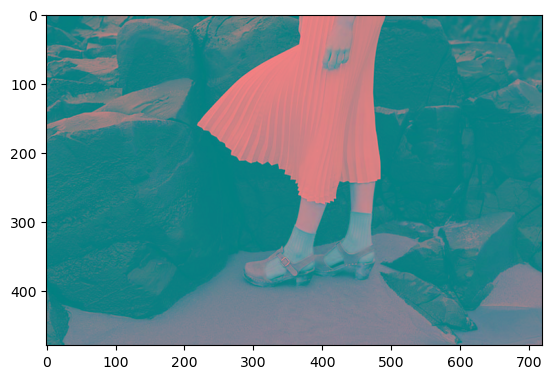

In [9]:
lab_image=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab_image)

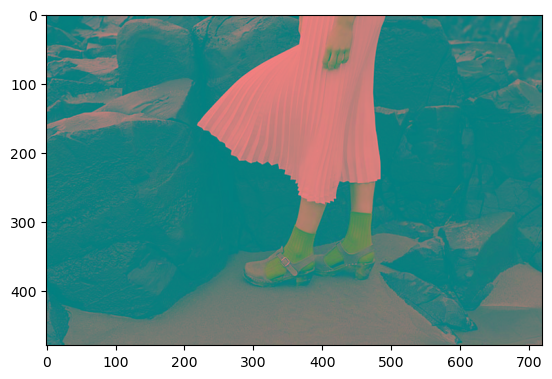

In [11]:
lab_image2=cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
plt.imshow(lab_image2)

(-0.5, 719.5, 479.5, -0.5)

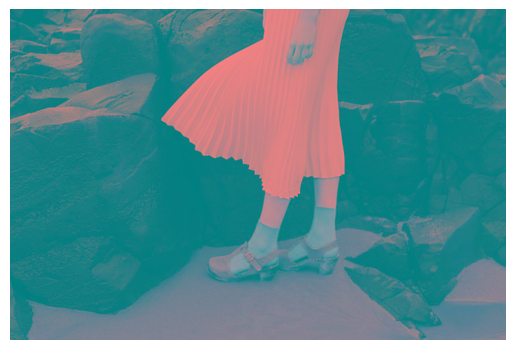

In [15]:
img3=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab_imageNew=cv2.cvtColor(img3,cv2.COLOR_RGB2LAB)
plt.imshow(lab_imageNew)
plt.axis('off')

In [19]:
L, a, b = cv2.split(lab_imageNew)
print(L.shape, L.dtype)
print(a.shape, a.dtype)
print(b.shape, b.dtype)


(480, 720) uint8
(480, 720) uint8
(480, 720) uint8


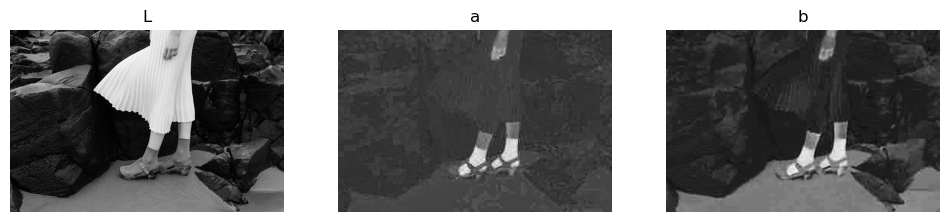

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(L, cmap='gray')
plt.title('L')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(a, cmap='gray')
plt.title('a')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(b, cmap='gray')
plt.title('b')
plt.axis('off')

plt.show()

In [27]:
def gamma_correction(channel, gamma):
    normalized = channel / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)

gamma = 0.5
L_corrected = gamma_correction(L, gamma)

lab_corrected = cv2.merge([L_corrected, a, b])

img_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)

(-0.5, 719.5, 479.5, -0.5)

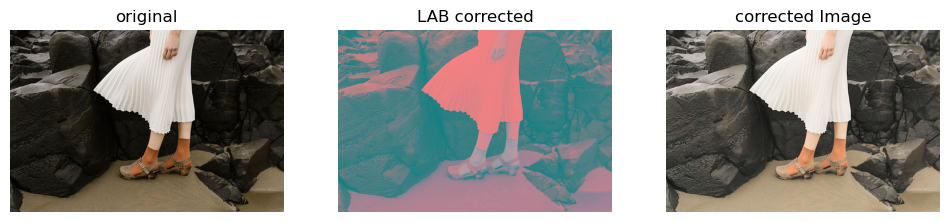

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(lab_corrected)
plt.title('LAB corrected')
plt.axis('off')    

plt.subplot(1,3,3)
plt.imshow(img_corrected)
plt.title('corrected Image')
plt.axis('off')    

Text(0.5, 1.0, 'corrected Image')

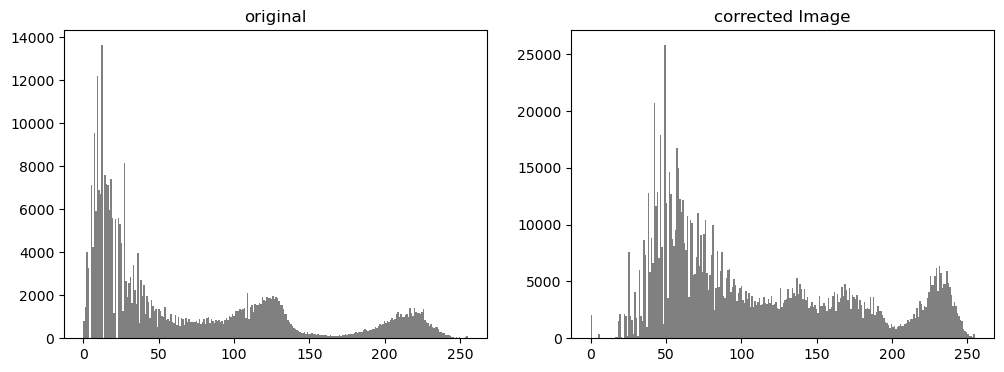

In [43]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, color='gray')
plt.title('original')

plt.subplot(1,2,2)
plt.hist(img_corrected.ravel(), bins=256, color='gray')
plt.title('corrected Image')

In [45]:
mean_L = np.mean(L)
print("Mean L value:", mean_L)

# Get a gamma value
new_gamma = np.log(0.5) / np.log(mean_L / 255)
print("Calculated gamma value:", new_gamma)

Mean L value: 71.256640625
Calculated gamma value: 0.5436552820131303


In [47]:
new_L_corrected = gamma_correction(L, new_gamma)

new_lab_corrected = cv2.merge([new_L_corrected, a, b])

new_img_corrected = cv2.cvtColor(new_lab_corrected, cv2.COLOR_LAB2RGB)

Text(0.5, 1.0, 'Corrected Image  histogram')

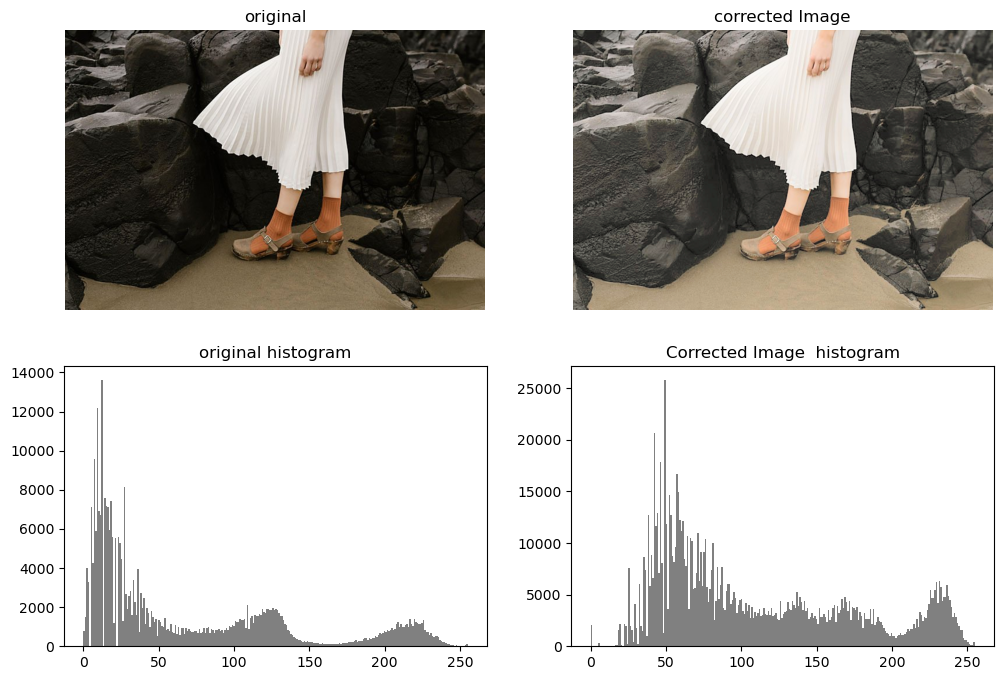

In [65]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_corrected)
plt.title('corrected Image')
plt.axis('off')    

plt.subplot(2,2,3)
plt.hist(L.ravel(), bins=256, color='gray')
plt.title('original histogram')

plt.subplot(2,2,4)
plt.hist(img_corrected.ravel(), bins=256, color='gray')
plt.title('Corrected Image  histogram')

(-0.5, 719.5, 479.5, -0.5)

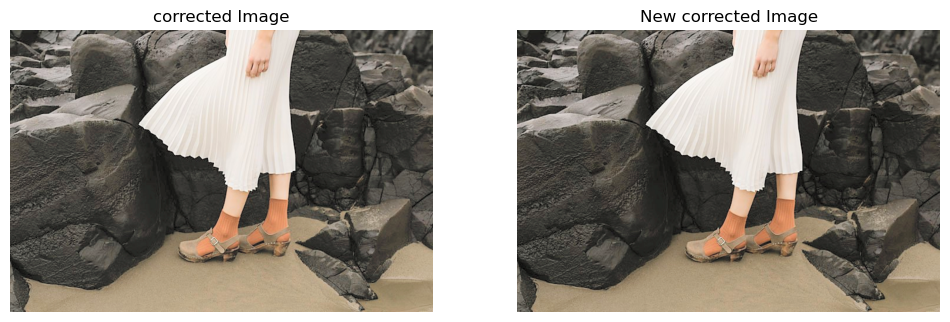

In [57]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img_corrected)
plt.title('corrected Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(new_img_corrected)
plt.title('New corrected Image')
plt.axis('off')    


(-0.5, 719.5, 479.5, -0.5)

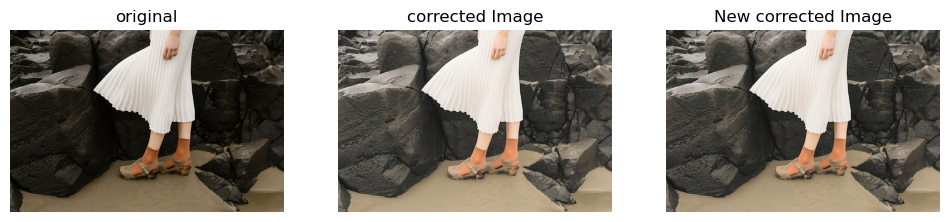

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_corrected)
plt.title('corrected Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(new_img_corrected)
plt.title('New corrected Image')
plt.axis('off')    


Text(0.5, 1.0, 'New corrected Image  histogram')

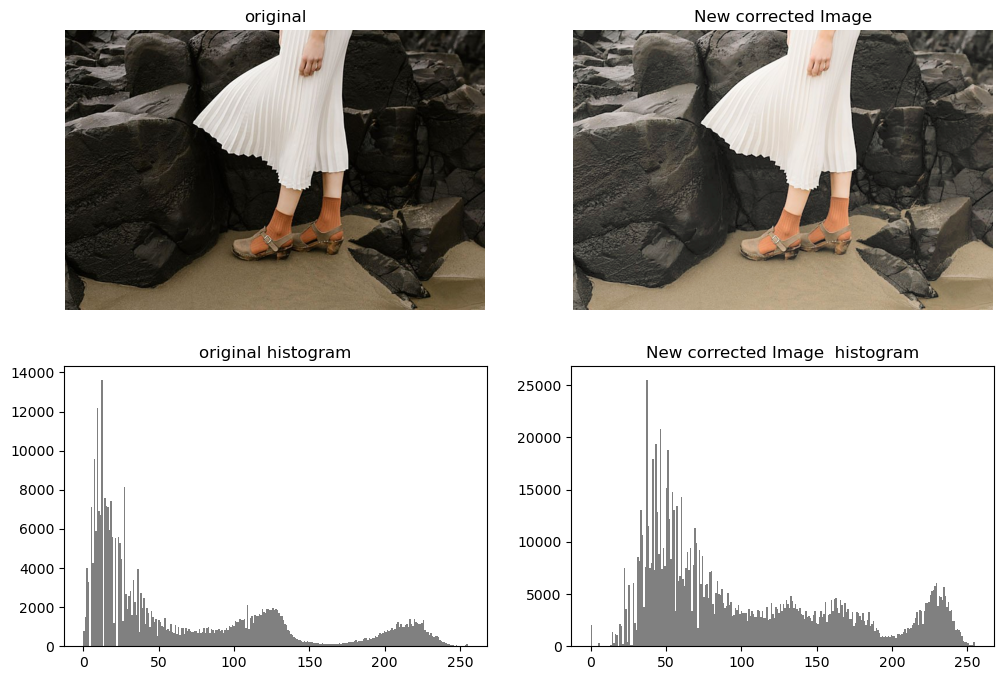

In [67]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(new_img_corrected)
plt.title('New corrected Image')
plt.axis('off')    

plt.subplot(2,2,3)
plt.hist(L.ravel(), bins=256, color='gray')
plt.title('original histogram')

plt.subplot(2,2,4)
plt.hist(new_img_corrected.ravel(), bins=256, color='gray')
plt.title('New corrected Image  histogram')